In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [4]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')

In [5]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/10000
data.rename(columns={'매출금액' : '매출금액(단위:만원)'}, inplace=True)

In [6]:
data.loc[(data.품목대분류명=='인테리어'),'품목대분류명']='기타'
data.loc[(data.품목대분류명=='가구'),'품목대분류명']='기타'
data.loc[(data.품목대분류코드=='13'),'품목대분류코드']='99'
data.loc[(data.품목대분류코드=='14'),'품목대분류코드']='99'

In [7]:
grouped = data['매출금액(단위:만원)'].groupby(data['품목대분류명']).sum()
df_g = pd.DataFrame(grouped)
df_g=df_g.sort_values(by=['매출금액(단위:만원)'])

In [ ]:
sorted_colors = [x[2] for x in labels_frequency]

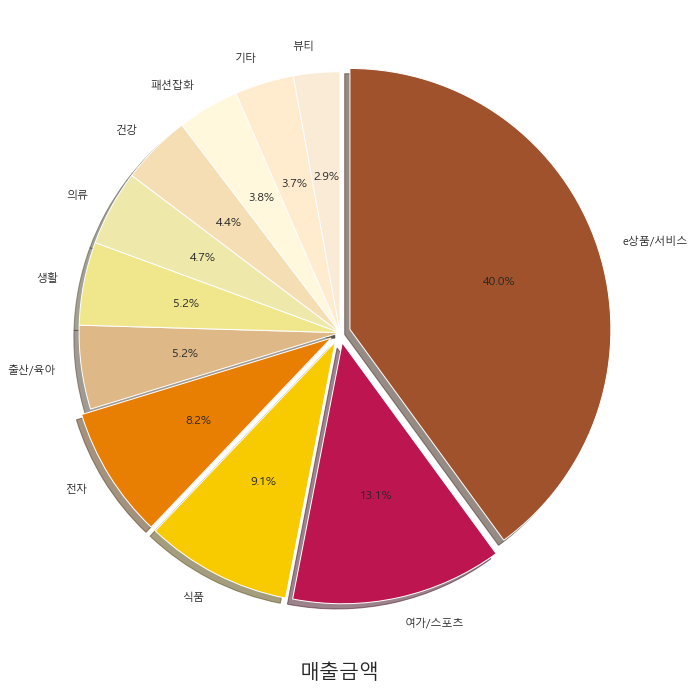

In [45]:
import matplotlib.pyplot as plt
import numpy as np

## 데이터 준비
labels = data['매출금액(단위:만원)'].groupby(data['품목대분류명']).sum().index## 라벨
colors = sns.color_palette('hls',len(labels)) ## 색상
frequency =data['매출금액(단위:만원)'].groupby(data['품목대분류명']).sum() ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = ['sienna','#bd1550','#f8ca00','#e97f02','burlywood','khaki','palegoldenrod','wheat','cornsilk','blanchedalmond','antiquewhite'] ## 정렬된 색상
 
fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
explode=[0.04,0.04,0.04,0.04,0,0,0,0,0,0,0]
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       labels=sorted_labels,
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       explode=explode,
       colors = sorted_colors,
       shadow=True,
       autopct= '%1.1f%%' ## 색상 지정
       )
plt.xlabel('매출금액',fontsize=20)
plt.show()

####인테리어 가구 기타

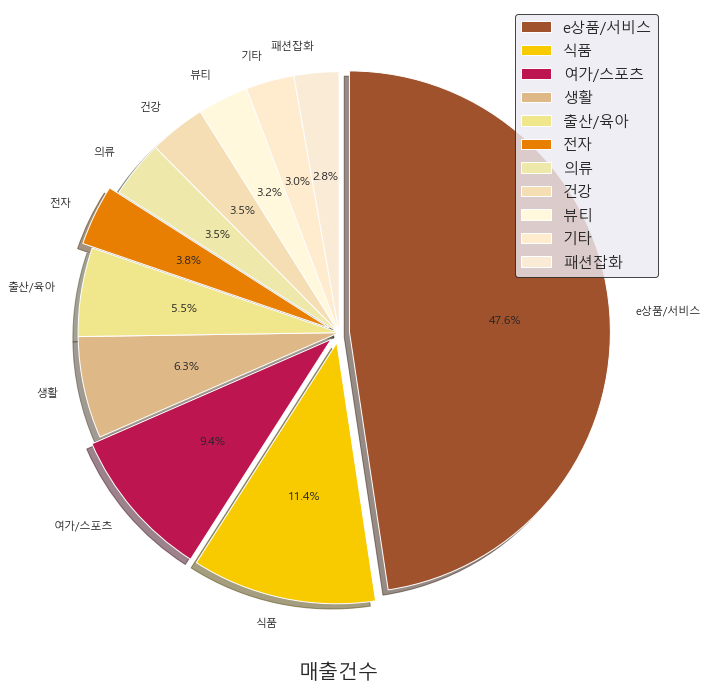

In [46]:
import matplotlib.pyplot as plt
import numpy as np

## 데이터 준비
labels = data['매출건수'].groupby(data['품목대분류명']).sum().index## 라벨
colors = sns.color_palette('hls',len(labels)) ## 색상
frequency =data['매출건수'].groupby(data['품목대분류명']).sum() ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = ['sienna','#f8ca00','#bd1550','burlywood','khaki','#e97f02','palegoldenrod','wheat','cornsilk','blanchedalmond','antiquewhite'] ## 정렬된 색상
 
fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
explode=[0.04,0.04,0.04,0,0,0.04,0,0,0,0,0]
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       labels=sorted_labels,
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       explode=explode,
       colors = sorted_colors,
       shadow=True,
       autopct= '%1.1f%%' ## 색상 지정
       )
plt.xlabel('매출건수',fontsize=20)
plt.legend(pie[0],sorted_labels,loc='upper right',fontsize=11,edgecolor='k') ## 범례
plt.show()

####인테리어 가구 기타

스케일링 한 뒤 다시 저장

식품

In [9]:
data_f = data[data['품목대분류명'] == '식품']
grouped_C = pd.DataFrame(data_f['매출건수'].groupby(data_f['기준년월']).sum())
grouped_M = pd.DataFrame(data_f['매출금액(단위:만원)'].groupby(data_f['기준년월']).sum())
df_f = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_f.reset_index(inplace=True)
df_f["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_f

,기준년월,매출금액(단위:만원),매출건수
0,19_03,1.624850e+06,475335
1,19_09,1.376297e+06,379678
2,20_03,2.100142e+06,613956
3,20_09,2.907012e+06,749066
4,21_03,2.290934e+06,686292


In [10]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(df_f) # df_f는 2차원 이상의 값이어야 함
df_f_scaled = scaler.transform(df_f)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_f_scaled = pd.DataFrame(data = df_f_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(df_f['매출금액(단위:만원)'].values.reshape(-1,1))
df_f.insert(0, '식품_매출금액(단위:만원)_scaled', A_n)
df_f.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_f['매출건수'].values.reshape(-1,1))
df_f.insert(0, '식품_매출건수_scaled', B_n)
df_f.drop(['매출건수'], axis=1, inplace=True)

여가/스포츠

In [11]:
data_s = data[data['품목대분류명'] == '여가/스포츠']
grouped_C = pd.DataFrame(data_s['매출건수'].groupby(data_s['기준년월']).sum())
grouped_M = pd.DataFrame(data_s['매출금액(단위:만원)'].groupby(data_s['기준년월']).sum())
df_s = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_s.reset_index(inplace=True)
df_s["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_s

,기준년월,매출금액(단위:만원),매출건수
0,19_03,3.146563e+06,490284
1,19_09,3.337995e+06,485056
2,20_03,2.314616e+06,413706
3,20_09,2.737054e+06,471876
4,21_03,3.333242e+06,528049


In [12]:
# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(df_s) # df_s는 2차원 이상의 값이어야 함
df_s_scaled = scaler.transform(df_s)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_s_scaled = pd.DataFrame(data = df_s_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(df_s['매출금액(단위:만원)'].values.reshape(-1,1))
df_s.insert(0, '여가/스포츠_매출금액(단위:만원)_scaled', A_n)
df_s.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_s['매출건수'].values.reshape(-1,1))
df_s.insert(0, '여가/스포츠_매출건수_scaled', B_n)
df_s.drop(['매출건수'], axis=1, inplace=True)


전자

In [13]:
data_j = data[data['품목대분류명'] == '전자']
grouped_C = pd.DataFrame(data_j['매출건수'].groupby(data_j['기준년월']).sum())
grouped_M = pd.DataFrame(data_j['매출금액(단위:만원)'].groupby(data_j['기준년월']).sum())
df_j = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_j.reset_index(inplace=True)
df_j["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_j

,기준년월,매출금액(단위:만원),매출건수
0,19_03,1.759479e+06,190838
1,19_09,1.486418e+06,175082
2,20_03,1.946585e+06,208306
3,20_09,1.992711e+06,179644
4,21_03,2.084544e+06,206078


In [14]:
# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(df_j) # df_j는 2차원 이상의 값이어야 함
df_j_scaled = scaler.transform(df_j)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_j_scaled = pd.DataFrame(data = df_j_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(df_j['매출금액(단위:만원)'].values.reshape(-1,1))
df_j.insert(0, '전자_매출금액(단위:만원)_scaled', A_n)
df_j.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_j['매출건수'].values.reshape(-1,1))
df_j.insert(0, '전자_매출건수_scaled', B_n)
df_j.drop(['매출건수'], axis=1, inplace=True)


e상품/서비스

In [15]:
data_e = data[data['품목대분류명'] == 'e상품/서비스']
grouped_C = pd.DataFrame(data_e['매출건수'].groupby(data_e['기준년월']).sum())
grouped_M = pd.DataFrame(data_e['매출금액(단위:만원)'].groupby(data_e['기준년월']).sum())
df_e = pd.merge(grouped_M, grouped_C, on = '기준년월')
df_e.reset_index(inplace=True)
df_e["기준년월"]=["19_03","19_09","20_03","20_09","21_03"]
df_e

,기준년월,매출금액(단위:만원),매출건수
0,19_03,7.020302e+06,1884001
1,19_09,7.255877e+06,1876005
2,20_03,9.464159e+06,2610928
3,20_09,1.003509e+07,2598550
4,21_03,1.164213e+07,3139815


In [16]:
# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(df_e) # df_e는 2차원 이상의 값이어야 함
df_e_scaled = scaler.transform(df_e)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
df_e_scaled = pd.DataFrame(data = df_e_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(df_e['매출금액(단위:만원)'].values.reshape(-1,1))
df_e.insert(0, 'e상품/서비스_매출금액(단위:만원)_scaled', A_n)
df_e.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(df_e['매출건수'].values.reshape(-1,1))
df_e.insert(0, 'e상품/서비스_매출건수_scaled', B_n)
df_e.drop(['매출건수'], axis=1, inplace=True)
df_e


,e상품/서비스_매출건수_scaled,e상품/서비스_매출금액(단위:만원)_scaled,기준년월
0,-1.112040,-1.183566,19_03
1,-1.128572,-1.048427,19_09
2,0.390905,0.218361,20_03
3,0.365313,0.545875,20_09
4,1.484396,1.467757,21_03


<function matplotlib.pyplot.show(close=None, block=None)>

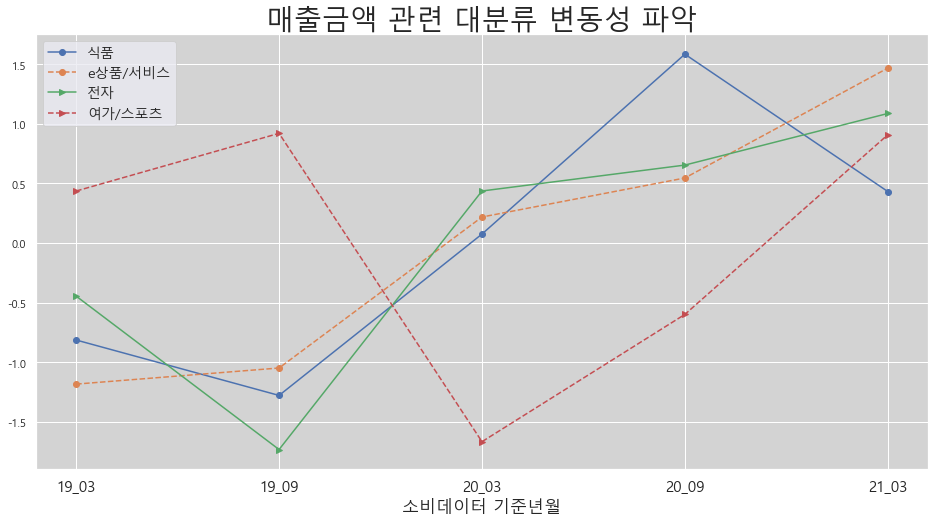

In [17]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot()
ax.plot(df_f['기준년월'],df_f['식품_매출금액(단위:만원)_scaled'],'-o',label='식품')
ax.plot(df_f['기준년월'],df_e['e상품/서비스_매출금액(단위:만원)_scaled'],'--o',label='e상품/서비스')
ax.plot(df_f['기준년월'],df_j['전자_매출금액(단위:만원)_scaled'],'->',label='전자')
ax.plot(df_f['기준년월'],df_s['여가/스포츠_매출금액(단위:만원)_scaled'],'-->',label='여가/스포츠')
ax.legend(fontsize=14)
plt.title('매출금액 관련 대분류 변동성 파악', fontsize = 28)
ax.set_facecolor('lightgray')
plt.xticks(fontsize = 15)
plt.xlabel('소비데이터 기준년월', fontsize = 17)
ax.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

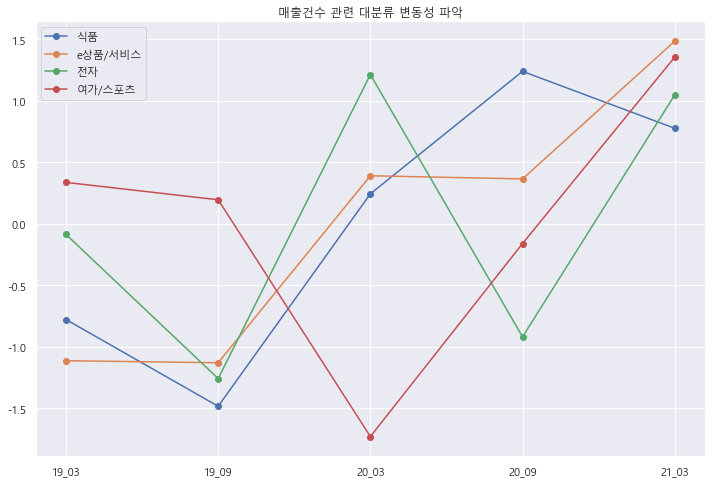

In [18]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot()
ax.plot(df_f['기준년월'],df_f['식품_매출건수_scaled'],marker='o',label='식품')
ax.plot(df_f['기준년월'],df_e['e상품/서비스_매출건수_scaled'],marker='o',label='e상품/서비스')
ax.plot(df_f['기준년월'],df_j['전자_매출건수_scaled'],marker='o',label='전자')
ax.plot(df_f['기준년월'],df_s['여가/스포츠_매출건수_scaled'],marker='o',label='여가/스포츠')
ax.legend()
plt.title('매출건수 관련 대분류 변동성 파악')
plt.show